In [2]:
import pandas as pd 
import numpy  as np
import seaborn as sea
import matplotlib.pyplot as plt

In [4]:
test  = pd.read_csv(r'datasets/MobilePricePrediction/test.csv',sep=',')
train = pd.read_csv(r'datasets/MobilePricePrediction/train.csv',sep=',')

&nbsp;

## Analise

In [12]:
dataset = pd.concat([train,test], axis=0)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_screen  

In [14]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2000.000000,1000.000000
mean,1241.849000,0.502000,1.528467,0.512000,4.404000,0.510000,32.581667,0.507000,140.003000,4.456333,...,1247.601667,2129.141333,12.202667,5.616667,11.035667,0.759667,0.502000,0.507000,1.500000,500.500000
std,437.063804,0.500079,0.820358,0.499939,4.383742,0.499983,18.152810,0.285969,35.213809,2.289361,...,434.666168,1085.694231,4.251151,4.322494,5.474400,0.427357,0.500079,0.500034,1.118314,288.819436
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,863.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,2.000000,...,865.000000,1212.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000,250.750000
50%,1232.000000,1.000000,1.500000,1.000000,3.000000,1.000000,33.000000,0.500000,140.000000,4.000000,...,1248.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000,500.500000
75%,1619.000000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,6.000000,...,1634.000000,3065.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000,750.250000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000,1000.000000


In [21]:
dataset.nunique()

battery_power    1275
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1333
px_width         1313
ram              2070
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
id               1000
dtype: int64

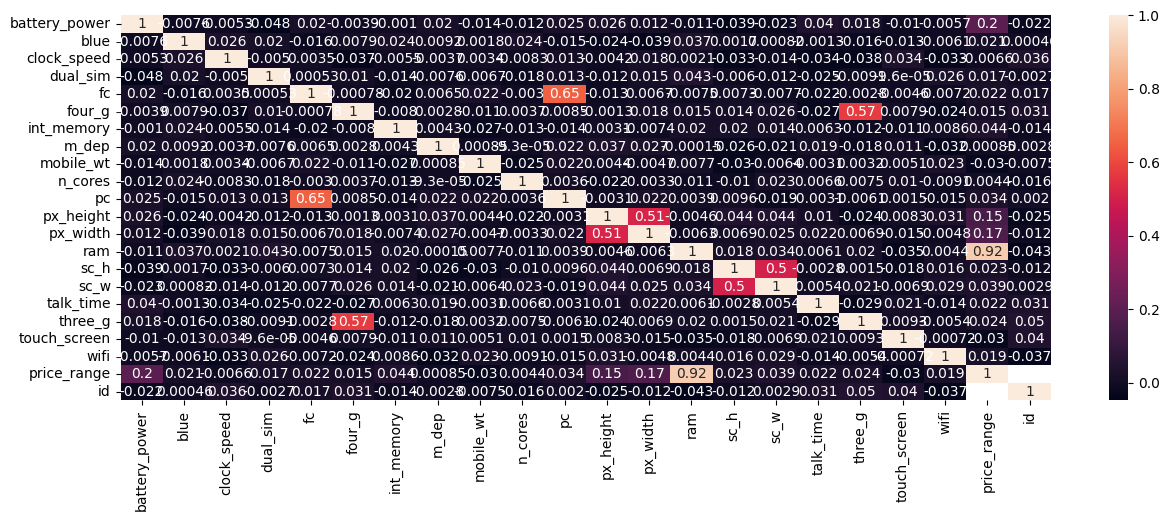

In [20]:
plt.figure(figsize=(15,5))
sea.heatmap(dataset.corr(), annot=True)
plt.show()

In [55]:
class SelectType:
    def __init__(self, data:pd.DataFrame):
        self.data = data

    def binWithBin(self):
        binary = list()
        for tupla in self.data.nunique().reset_index().iterrows():
            if tupla[1].values[1] == 2:
                binary.append(tupla[1].values[0])
        return binary
    
    def binWithNum(self):
        pass


class Correlation:
    from scipy.stats import chi2_contingency
    M_ = None
    
    def __init__(self, column1:list, column2:list):
        self.columnNames1 = column1
        self.columnNames2 = column2
        self.tupla        = ( len(self.columnNames1) , len(self.columnNames2) ) 

    def quiQuadrada(self, data:pd.DataFrame):
        self.M_ = np.zeros(shape=self.tupla)

        for enumI, i in enumerate(self.columnNames1):
            for enumJ, j in enumerate(self.columnNames2):
                chi, p, _, _ = self.chi2_contingency( pd.crosstab(data[i], data[j]) )
                self.M_[enumI,enumJ] = p
        
        return pd.DataFrame(self.M_, columns=self.columnNames1, index=self.columnNames2)

,blue,dual_sim,four_g,three_g,touch_screen,wifi
blue,0.000000,0.291890,6.910990e-01,4.140367e-01,0.487263,0.767828
dual_sim,0.291890,0.000000,6.018887e-01,6.475567e-01,1.000000,0.170784
four_g,0.691099,0.601889,0.000000e+00,3.027860e-216,0.691099,0.208676
three_g,0.414037,0.647557,3.027860e-216,0.000000e+00,0.641886,0.800747
touch_screen,0.487263,1.000000,6.910990e-01,6.418855e-01,0.000000,0.997552
wifi,0.767828,0.170784,2.086757e-01,8.007465e-01,0.997552,0.000000
